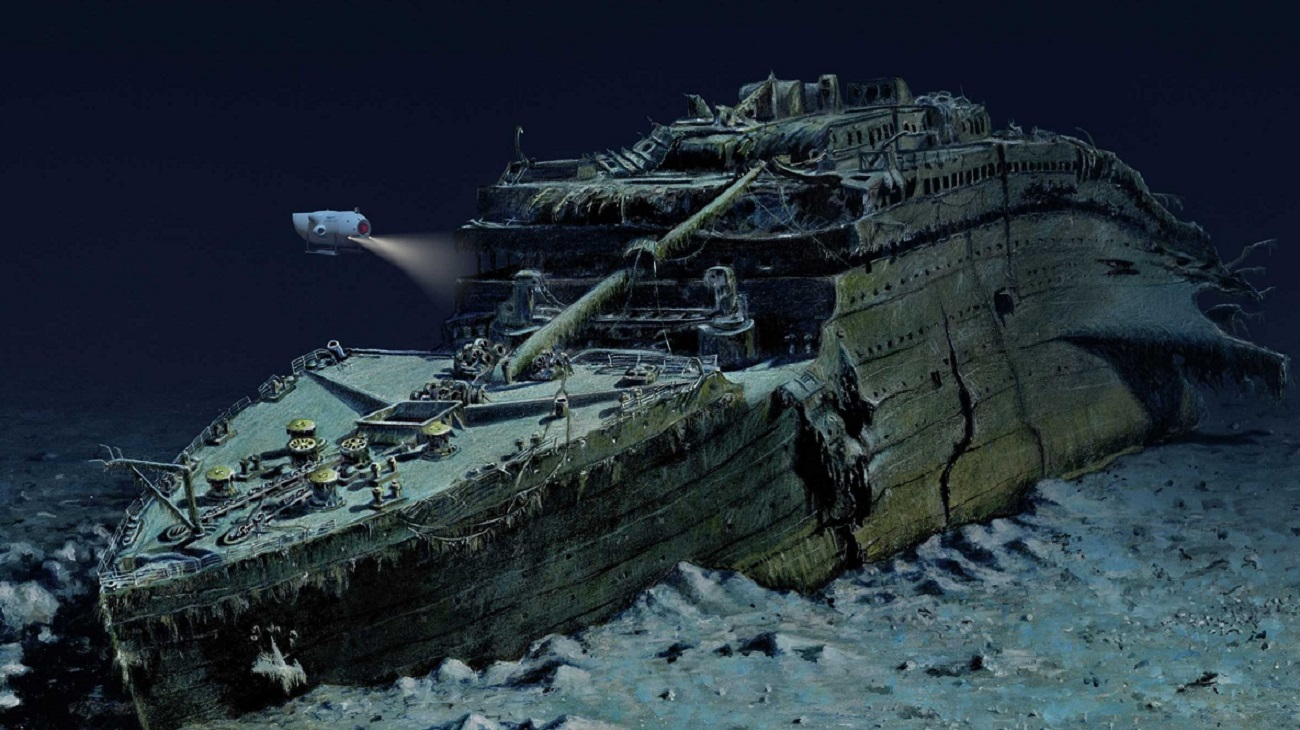

There are a lot of different model applications and evaluations based on accuracy scores on Titanic! What I am trying to do here is to examine the variables in general and make comments on them. Those who want to add, copy the kernel and work on it, so we examine a dataset together.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
from subprocess import check_output             # utf-8 e uygun olup olmadigini arastirmak icin bunu aratiyoruz
print(check_output(["ls","../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [ ]:
data = pd.read_csv('../input/titanic-cleaned-data/train_clean.csv')
data.info()
                

In [ ]:
data.head()

In [ ]:
data.Age.value_counts()

In [ ]:
data.PassengerId.unique()

In [ ]:
PassengerId_list = list(data['PassengerId'].head(30).unique())
# print(PassengerId_list)

Age_ratio = []
for i in PassengerId_list:
    x = data[data['PassengerId']==i]
    Age_rate = sum(x.Age)/len(x)
    Age_ratio.append(Age_rate)
data2 = pd.DataFrame({'PassengerId_list': PassengerId_list,'Age_ratio':Age_ratio})


# Duzenlenen datayi yeniden index lememiz gerekiyor ki duzenli gorunsun!!! Bunun icin:

new_index = (data2['Age_ratio'].sort_values(ascending=False)).index.values
sorted_data = data2.reindex(new_index)


In [ ]:

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['PassengerId_list'], y=sorted_data['Age_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('PassengerId')
plt.ylabel('Ages')
plt.title('Age Given PassengerId_list')

In [ ]:
data.head()

In [ ]:
data.Name.value_counts()

In [ ]:
separate = data.Name[data.Name != 'TK TK'].str.split() 
a,b,c = zip(*separate)
# print(separate)
name_list = a+b+c 
print(name_list)

In [ ]:
name_count = Counter(name_list)
print(name_count)
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)

In [ ]:
# PLOT unu cizelim

plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of Titanic people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of Titanic people')
print(most_common_names)

In [ ]:
# PassengerId_list = list(data['PassengerId'].head(30).unique())
# print(PassengerId_list)

Fare_ratio = []
for i in PassengerId_list:
    x = data[data['PassengerId']==i]
    Fare_rate = sum(x.Fare)/len(x)
    Fare_ratio.append(Fare_rate)
data3 = pd.DataFrame({'PassengerId_list': PassengerId_list,'Fare_ratio':Fare_ratio})


# Duzenlenen datayi yeniden index lememiz gerekiyor ki duzenli gorunsun!!! Bunun icin:

new_index = (data3['Fare_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data3.reindex(new_index)

In [ ]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['PassengerId_list'], y=sorted_data2['Fare_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('PassengerId')
plt.ylabel('Fare')
plt.title('Fare Given PassengerId_list')

In [ ]:
data.head()

In [ ]:
PassengerId_list = list(data['PassengerId'].unique())
Age = []
Fare = []
Pclass = []
Family_Size = []

for i in PassengerId_list:
    x = data[data['PassengerId']==i]
    Age.append(sum(x.Age)/len(x))
    Fare.append(sum(x.Fare) / len(x))
    Pclass.append(sum(x.Pclass) / len(x))
    Family_Size.append(sum(x.Family_Size) / len(x))
   

In [ ]:
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=Age,y=PassengerId_list,color='green',alpha = 0.5,label='Age' )
sns.barplot(x=Fare,y=PassengerId_list,color='blue',alpha = 0.7,label='Fare')
sns.barplot(x=Pclass,y=PassengerId_list,color='cyan',alpha = 0.6,label='Passenger class')
sns.barplot(x=Family_Size,y=PassengerId_list,color='red',alpha = 0.6,label='Family_Size')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Passengers', ylabel='Passengers',title = "Percentage of Passengers According to Fare,Class ")

In [ ]:
sorted_data['Age_ratio'] = sorted_data['Age_ratio']/max( sorted_data['Age_ratio'])
sorted_data2['Fare_ratio'] = sorted_data2['Fare_ratio']/max( sorted_data2['Fare_ratio'])
data4 = pd.concat([sorted_data,sorted_data2['Fare_ratio']],axis=1)
data4.sort_values('Age_ratio',inplace=True)

In [ ]:
# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='PassengerId_list',y='Fare_ratio',data=data4,color='lime',alpha=0.8)
sns.pointplot(x='PassengerId_list',y='Age_ratio',data=data4,color='red',alpha=0.8)
plt.text(25,1,'PassengerId_list',color='red',fontsize = 17,style = 'italic')   # burdaki degerler yazilarin konumlari istedigimiz gibi degistirebiliriz
plt.text(25,0.95,'Fare_ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Age_ratio  VS  Fare_ratio',fontsize = 20,color='blue')
plt.grid()

In [ ]:
g = sns.jointplot(data4.Fare_ratio, data4.Age_ratio, kind="kde", size=7)
plt.savefig('graph.png')                          # bu bize sekilleri kaydetmemizi saglar
plt.show()

In [ ]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one

g = sns.jointplot("Fare_ratio", "Age_ratio", data=data4,size=5, ratio=3, color="r")

In [ ]:
data.head()

 # Pie Chart

In [ ]:
data.Pclass.dropna(inplace = True)
labels = data.Pclass.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = data.Pclass.value_counts().values

In [ ]:
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Titanic People According to Class',color = 'blue',fontsize = 15)

# Lm Plot

In [ ]:
data4.head()

In [ ]:
sns.lmplot(x="Fare_ratio", y="Age_ratio", data=data4)
plt.show()

# Kde Plot

In [ ]:
sns.kdeplot(data4.Fare_ratio, data4.Age_ratio, shade=True, cut=3)      # burada 'cut' sekil arasi genisligi verir
plt.show()

# Violin Plot

In [ ]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

# Heatmap

In [ ]:
data4.corr()

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data4.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()                   
#annot tells whether to show the numbers inside the box
#fmt . returns values after

# Pair Plot

In [ ]:
# pair plot
sns.pairplot(data4)
plt.show()

# Count Plot

In [ ]:
sns.countplot(data.Age.head())
#sns.countplot(kill.manner_of_death)                 # if you want you can draw seperately
plt.title("Fare according to Age",color = 'blue',fontsize=15)

In [ ]:
data.head(10)

In [ ]:
# lets see data columns

data.columns

In [ ]:
data.Age.plot(kind= 'line', color= 'b', label= 'Age', linewidth= 2, alpha= 0.5, grid= True, linestyle= '-')
data.Fare.plot(color= 'r', label= 'Fare', linewidth= 2, alpha= 0.5, grid= True, linestyle= '-.')
plt.legend(loc= 'upper right')          #legend= puts label into plot
plt.xlabel('x axis')                    #label= name of label
plt.ylabel('y axis')                    #label= name of label
plt.title('Line Plot')                  #title= title of plot
plt.show()

In [ ]:
data.plot(kind = 'scatter', x = 'Age', y= 'Fare', alpha = 0.5, color = 'red')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age & Fare Scatter Plot')
plt.show()

In [ ]:
data.Age.plot(kind = 'hist',bins = 70, figsize = (12,12))
plt.show()

In [ ]:
data.Age.plot(kind = 'hist',bins = 50)
plt.clf()  

### The data series here extends as vectors and are one-dimensional structures.

In [ ]:
data = pd.read_csv('../input/titanic-cleaned-data/test_clean.csv')
series = data['Age']                           
print(type(series))     
data_frame = data[['Fare']]  
print(type(data_frame))

In [ ]:
x = data['Age'] < 20                           # Defans değeri 200'den büyük olan verileri x değişkenine atıyoruz.
print(x)                                       # bu sekilde true false olanlarin hepsini gosterir
data[x]                                        # sinirlama yapilan hangi pokemonlar ve ozelliklerini verir

In [ ]:
data[np.logical_and(data['Age'] < 20, data['Fare'] > 100.000 )] 

# It is used when the logical and function is required to be provided in two conditions.
# here we say that the defense value is greater than 200 and at the same time the attack value is greater than 100.

In [ ]:
# The following structure can be used as an alternative to the logical and function.

data[(data['Age'] < 20) & (data['Fare'] > 100.000 )]

In [ ]:
threshold = sum(data.Age)/len(data.Age)
data["old_situation"] = ["old" if i > threshold else "young" for i in data.Age]
data.loc[:10,["old_situation","Age"]]

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
# data.dropna(inplace = True)  
# data.describe()

# Since there is no empty space here, the description according to the blanks is empty.

In [ ]:
# For example: compare Family_Size with fare are high or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers

data.boxplot(column='Fare',by = 'Family_Size')

In [ ]:
data_new = data.head()    # I only take 5 rows into new data
data_new

In [ ]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt

melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Sex','Title'])
melted

In [ ]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value

melted.pivot(index = 'Name', columns = 'variable',values='value')

In [ ]:
# Firstly lets create 2 data frame

data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True)     # axis = 0 : adds dataframes in row
conc_data_row

In [ ]:
data3 = data['Name'].head()
data1 = data['Sex'].head()
data2= data['Title'].head()
conc_data_col = pd.concat([data3,data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

In [ ]:
data.dtypes

# Box Plot

In [ ]:
data.Sex.unique()

In [ ]:
data.head()

In [ ]:
# Plot the orbital period with horizontal boxes

sns.boxplot(x="old_situation", y="Fare", hue="Sex", data=data, palette="PuOr")
plt.show()

# Swarm Plot

In [ ]:
sns.swarmplot(x="old_situation", y="Fare",hue="Sex", data=data)
plt.show()

Note:

    After this notebook, my aim is to prepare 'kernel' which is 'not clear' data set.

    If you have any suggestions, please could you write for me? I wil be happy for comment and critics!

    Thank you for your suggestion and votes ;)
